In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams["svg.fonttype"] = "none"
matplotlib.rcParams["font.family"] = "Arial"
import torch
import numpy as np

from src import datasets, train, models, metric

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
root = ""  # TODO: Change this to the project folder

## Build all results

In [ ]:
analysis_2_1 = metric.EphysAnalysis(root, "blocks", 2, 1, [50, 100, 150])
analysis_2_5 = metric.EphysAnalysis(root, "blocks", 2, 5, [50, 100, 150])
analysis_2_10 = metric.EphysAnalysis(root, "blocks", 2, 10, [50, 100, 150])
analysis_2_20 = metric.EphysAnalysis(root, "blocks", 2, 20, [50, 100, 150])
analysis_2_40 = metric.EphysAnalysis(root, "blocks", 2, 40, [50, 100, 150])
analysis_2_80 = metric.EphysAnalysis(root, "blocks", 2, 80, [50, 100, 150])

analysis_2_1.ev_df(50, True)
analysis_2_5.ev_df(50, True)
analysis_2_10.ev_df(50, True)
analysis_2_20.ev_df(50, True)
analysis_2_40.ev_df(50, True)
analysis_2_80.ev_df(50, True)

Building 0/146 505808144...
Building 1/146 490267468...
Building 2/146 480171386...
Building 3/146 501895840...
Building 4/146 484738748...
Building 5/146 593448793...
Building 6/146 569424261...
Building 7/146 395830185...
Building 8/146 502260112...
Building 9/146 485884503...
Building 10/146 486500736...
Building 11/146 575774870...
Building 12/146 568584929...
Building 13/146 580212997...
Building 14/146 397248752...
Building 15/146 486239338...
Building 16/146 480087928...
Building 17/146 501014504...
Building 18/146 560924223...
Building 19/146 508566646...
Building 20/146 487601493...
Building 21/146 486132712...
Building 22/146 490263211...
Building 23/146 609485897...
Building 24/146 484564503...
Building 25/146 502193385...
Building 26/146 476823462...
Building 27/146 476129135...
Building 28/146 490626718...
Building 29/146 473020156...
Building 30/146 560690291...
Building 31/146 486198953...
Building 32/146 327970859...
Building 33/146 480778441...
Building 34/146 49020599

Building 135/146 507770911...
Building 136/146 505795846...
Building 137/146 329550277...
Building 138/146 485931158...
Building 139/146 479091820...
Building 140/146 476266853...
Building 141/146 476525478...
Building 142/146 476753465...
Building 143/146 489888898...
Building 144/146 502245101...
Building 145/146 327566447...
Building 0/146 505808144...
Building 1/146 490267468...
Building 2/146 480171386...
Building 3/146 501895840...
Building 4/146 484738748...
Building 5/146 593448793...
Building 6/146 569424261...
Building 7/146 395830185...
Building 8/146 502260112...
Building 9/146 485884503...
Building 10/146 486500736...
Building 11/146 575774870...
Building 12/146 568584929...
Building 13/146 580212997...
Building 14/146 397248752...
Building 15/146 486239338...
Building 16/146 480087928...
Building 17/146 501014504...
Building 18/146 560924223...
Building 19/146 508566646...
Building 20/146 487601493...
Building 21/146 486132712...
Building 22/146 490263211...
Building 23/1

In [ ]:
analysis_1_1 = metric.EphysAnalysis(root, "blocks", 1, 1, [50, 100, 150])
analysis_4_1 = metric.EphysAnalysis(root, "blocks", 4, 1, [50, 100, 150])
analysis_6_1 = metric.EphysAnalysis(root, "blocks", 6, 1, [50, 100, 150])
analysis_8_1 = metric.EphysAnalysis(root, "blocks", 8, 1, [50, 100, 150])
analysis_16_1 = metric.EphysAnalysis(root, "blocks", 16, 1, [50, 100, 150])

analysis_1_1.ev_df(50, True)
analysis_4_1.ev_df(50, True)
analysis_6_1.ev_df(50, True)
analysis_8_1.ev_df(50, True)
analysis_16_1.ev_df(50, True)

In [ ]:
st_analysis_2_1 = metric.EphysAnalysis(root, "standard", 2, 1, [50, 100, 150])
st_analysis_2_1.ev_df(50, True)

st_analysis_4_1 = metric.EphysAnalysis(root, "standard", 4, 1, [50, 100, 150])
st_analysis_4_1.ev_df(50, True)

In [ ]:
# Load ephys fits for DT=0.05ms (requested by one reviewer)
analysis_2_05 = metric.EphysAnalysis(root, "blocks", 2, 0.5, [50, 100, 150])
st_analysis_2_05 = metric.EphysAnalysis(root, "standard", 2, 0.5, [50, 100, 150])
analysis_2_05.ev_df(50, True)
st_analysis_2_05.ev_df(50, True)

## Example fits

In [9]:
def plot_example_traces(anaysis, neuron_idx):
    spikes, mem, target_spikes, target_mem, i = anaysis.load_prediction(str(neuron_idx)) # 489888898, 469864405
    print(spikes.shape, mem.shape)
    print(target_spikes.shape, target_mem.shape)
    
    fig, axs = plt.subplots(3, 2, figsize=(10, 4.5))
    axs[0, 0].plot(2*spikes[0, 1] + mem[0, 1], c="green", linewidth=2.0)
    axs[0, 1].plot(2*spikes[0, 2] + mem[0, 2], c="green", linewidth=2.0)
    axs[1, 0].plot(target_mem[0, 1], c="blue", linewidth=2.0)
    axs[1, 1].plot(target_mem[0, 2], c="blue", linewidth=2.0)
    axs[2, 0].plot(i[0, 1], c="orange")
    axs[2, 1].plot(i[0, 2], c="orange")
    
    axs[0, 0].set_ylim([0, 3])
    axs[0, 1].set_ylim([0, 3])
    axs[1, 0].set_ylim([0, 3])
    axs[1, 1].set_ylim([0, 3])
    axs[2, 0].set_ylim([0, 0.01])
    axs[2, 1].set_ylim([0, 0.01])
    
    for ax_ in axs:
        for ax in ax_:
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)
            ax.spines['left'].set_visible(False)
            ax.spines['bottom'].set_visible(False)
            ax.set_xticks([])
            ax.set_yticks([])
            
    return axs[2, 0]

torch.Size([1, 3, 10000]) torch.Size([1, 3, 10000])
torch.Size([4, 3, 10000]) torch.Size([4, 3, 10000])


[Text(0, 0, ''), Text(1000, 0, '100ms'), Text(10000, 0, '')]

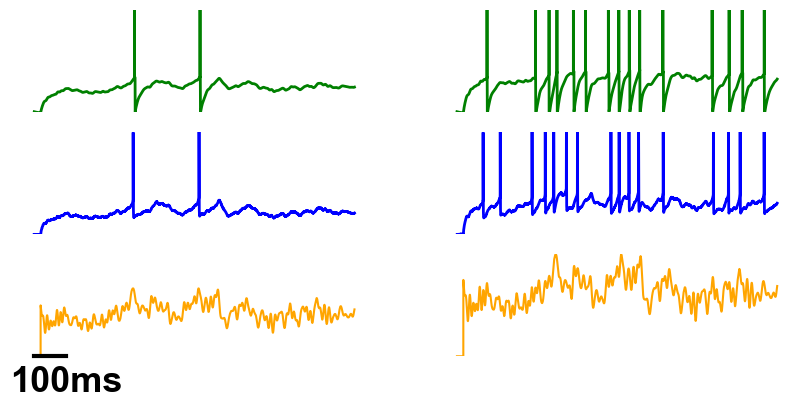

In [10]:
ax = plot_example_traces(analysis_2_1, 561552455)

edge_width=3
ax.spines["bottom"].set_linewidth(edge_width)
ax.xaxis.set_tick_params(width=0)
ax.set_xticks([0, 1000, 10000])
ax.spines['bottom'].set_bounds(0, 1000)
ax.spines['bottom'].set_visible(True)
ax.set_xticklabels(["", "100ms", ""], fontweight="bold", fontsize=26)

torch.Size([1, 3, 250]) torch.Size([1, 3, 250])
torch.Size([4, 3, 10000]) torch.Size([4, 3, 10000])


<AxesSubplot:>

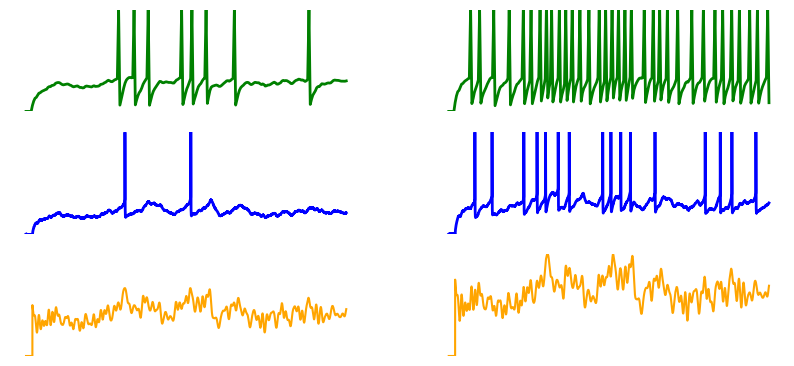

In [11]:
plot_example_traces(analysis_2_40, 561552455)

torch.Size([1, 3, 10000]) torch.Size([1, 3, 10000])
torch.Size([4, 3, 10000]) torch.Size([4, 3, 10000])


<AxesSubplot:>

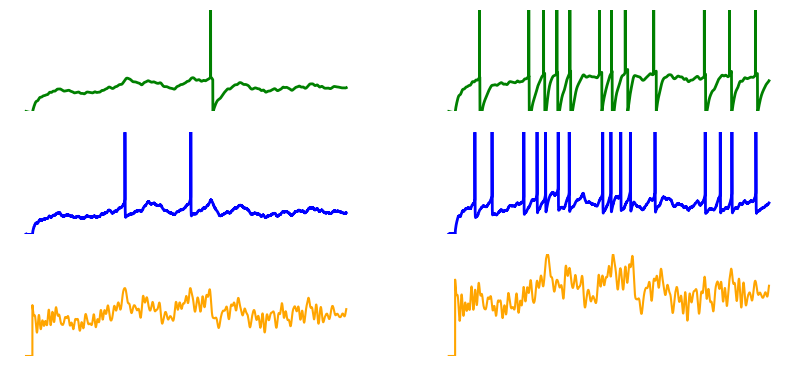

In [12]:
plot_example_traces(analysis_8_1, 561552455)

## Accuracy vs dt

In [13]:
tau = 150
dt_df = pd.DataFrame({".05": analysis_2_05.ev_df(tau, True)["score"], ".1": analysis_2_1.ev_df(tau, True)["score"], "0.5": analysis_2_5.ev_df(tau, True)["score"], "1": analysis_2_10.ev_df(tau, True)["score"], "2": analysis_2_20.ev_df(tau, True)["score"], "4": analysis_2_40.ev_df(tau, True)["score"], "8": analysis_2_80.ev_df(tau, True)["score"]})

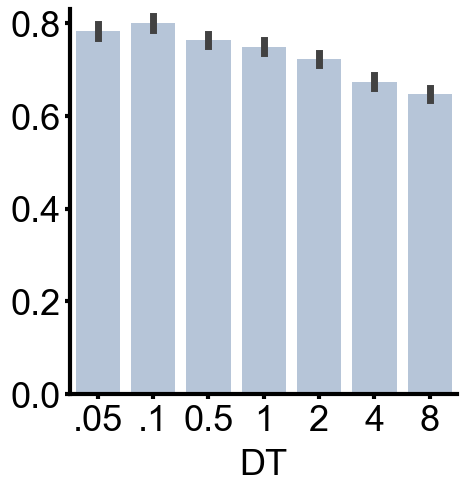

In [14]:
plt.figure(figsize=(5, 5))
ax = sns.barplot(dt_df, estimator="median", errorbar=("se"), color="lightsteelblue", errwidth=5)
ax.set_ylim([0., 0.83])
ax.set_ylabel("", fontsize=26, labelpad=8)
ax.set_xlabel("DT", fontsize=26, labelpad=8)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_linewidth(3)
ax.xaxis.set_tick_params(width=3, labelsize=26)
ax.spines["left"].set_linewidth(3)
ax.yaxis.set_tick_params(width=3, labelsize=26)

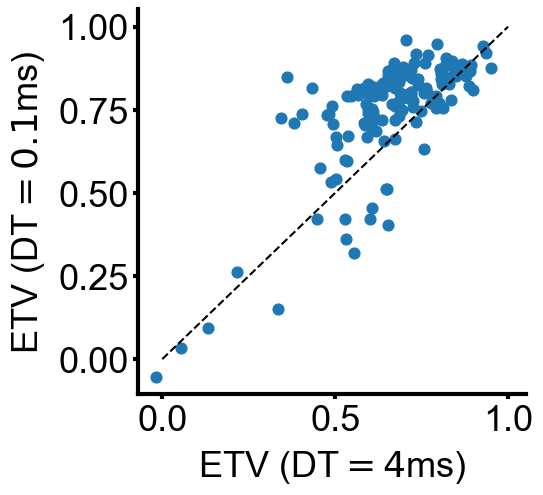

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
ax.scatter(analysis_2_40.ev_df(tau, True)["score"].values, analysis_2_1.ev_df(tau, True)["score"].values, s=60)
ax.plot([0,1], [0,1], "--", c="k")
ax.set_ylabel("ETV (DT$=0.1$ms)", fontsize=26, labelpad=8)
ax.set_xlabel("ETV (DT$=4$ms)", fontsize=26, labelpad=8)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_linewidth(3)
ax.xaxis.set_tick_params(width=3, labelsize=26)
ax.spines["left"].set_linewidth(3)
ax.yaxis.set_tick_params(width=3, labelsize=26)

## Accuracy vs abs refac

In [16]:
tau = 150
refac_df = pd.DataFrame({"1": analysis_1_1.ev_df(tau, True)["score"], "2": analysis_2_1.ev_df(tau, True)["score"], "4": analysis_4_1.ev_df(tau, True)["score"], "6": analysis_6_1.ev_df(tau, True)["score"], "8": analysis_8_1.ev_df(tau, True)["score"], "16": analysis_16_1.ev_df(tau, True)["score"]})


Text(0, 0.5, 'ETV')

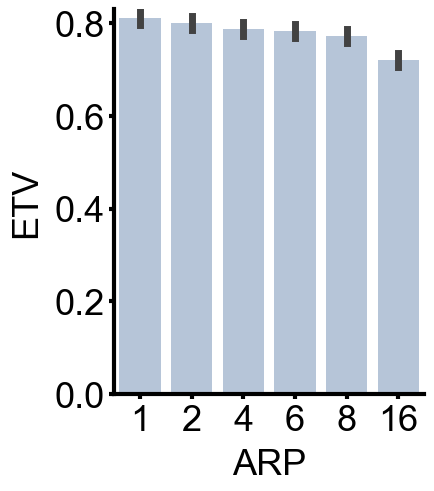

In [18]:
plt.figure(figsize=(4, 5))
ax = sns.barplot(refac_df, estimator="median", errorbar=("se"), color="lightsteelblue", errwidth=5)
ax.set_ylim([0., 0.83])
ax.set_ylabel("Explained Temporal variance", fontsize=26, labelpad=8)
ax.set_xlabel("ARP", fontsize=26, labelpad=8)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_linewidth(3)
ax.xaxis.set_tick_params(width=3, labelsize=26)
ax.spines["left"].set_linewidth(3)
ax.yaxis.set_tick_params(width=3, labelsize=26)
ax.set_ylabel("ETV", fontsize=26, labelpad=8)

## Blocks vs standard

In [19]:
tau = 150
blocks_vs_standard_df = pd.DataFrame({"blocks": analysis_2_1.ev_df(tau, True)["score"], "standard": st_analysis_2_1.ev_df(tau, True)["score"]})


Text(0, 0.5, 'ETV')

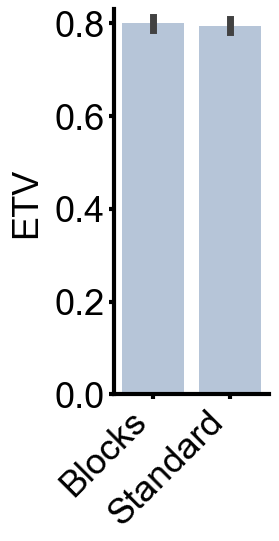

In [20]:
plt.figure(figsize=(2, 5))
ax = sns.barplot(blocks_vs_standard_df, estimator="median", errorbar=("se"), color="lightsteelblue", errwidth=5)
ax.set_ylim([0., 0.83])
ax.set_ylabel("Explained Temporal variance", fontsize=26, labelpad=8)
ax.set_xticklabels(["Blocks", "Standard"], rotation=45, ha="right")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_linewidth(3)
ax.xaxis.set_tick_params(width=3, labelsize=26)
ax.spines["left"].set_linewidth(3)
ax.yaxis.set_tick_params(width=3, labelsize=26)
ax.set_ylabel("ETV", fontsize=26, labelpad=8)

In [21]:
blocks_times_df = analysis_2_1.get_times_df()
blocks_times_df["model"] = "blocks"
blocks_times_df["total"] = blocks_times_df["forward_pass"] + blocks_times_df["backward_pass"]
standard_times_df = st_analysis_2_1.get_times_df()
standard_times_df["model"] = "standard"
standard_times_df["total"] = standard_times_df["forward_pass"] + standard_times_df["backward_pass"]
times_df = pd.concat([blocks_times_df, standard_times_df])

print(f'blocks={blocks_times_df["total"].mean()} standard={standard_times_df["total"].mean()}')

blocks=15.557545500258877 standard=108.3641897178676


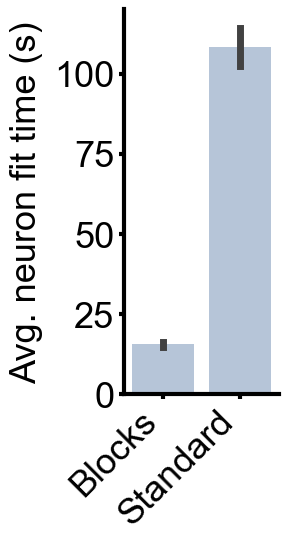

In [22]:
plt.figure(figsize=(2, 5))
ax = sns.barplot(data=times_df, x="model", y="total", estimator="mean", errorbar=("se"), color="lightsteelblue", errwidth=5)
ax.set_ylabel("Avg. neuron fit time (s)", fontsize=26, labelpad=8)
ax.set_xticklabels(["Blocks", "Standard"], rotation=45, ha="right")
ax.set_xlabel("", fontsize=26, labelpad=8)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_linewidth(3)
ax.xaxis.set_tick_params(width=3, labelsize=26)
ax.spines["left"].set_linewidth(3)
ax.yaxis.set_tick_params(width=3, labelsize=26)

In [23]:
foo = times_df.groupby("model").mean()
foo.loc["blocks"]["total"], foo.loc["standard"]["total"], foo.loc["standard"]["total"] / foo.loc["blocks"]["total"]

/tmp/ipykernel_823455/172251466.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  foo = times_df.groupby("model").mean()


(15.557545500258877, 108.3641897178676, 6.9653782928717405)

## Viewing fit parameters

In [24]:
params_df = analysis_2_1.load_params_df().set_index("neuron_idx")
params_df.index = params_df.index.astype(int)
params_df = params_df.join(neuron_info_df)

Building 0/146 505808144...
Building 1/146 490267468...
Building 2/146 480171386...
Building 3/146 501895840...
Building 4/146 484738748...
Building 5/146 593448793...
Building 6/146 569424261...
Building 7/146 395830185...
Building 8/146 502260112...
Building 9/146 485884503...
Building 10/146 486500736...
Building 11/146 575774870...
Building 12/146 568584929...
Building 13/146 580212997...
Building 14/146 397248752...
Building 15/146 486239338...
Building 16/146 480087928...
Building 17/146 501014504...
Building 18/146 560924223...
Building 19/146 508566646...
Building 20/146 487601493...
Building 21/146 486132712...
Building 22/146 490263211...
Building 23/146 609485897...
Building 24/146 484564503...
Building 25/146 502193385...
Building 26/146 476823462...
Building 27/146 476129135...
Building 28/146 490626718...
Building 29/146 473020156...
Building 30/146 560690291...
Building 31/146 486198953...
Building 32/146 327970859...
Building 33/146 480778441...
Building 34/146 49020599

NameError: name 'neuron_info_df' is not defined

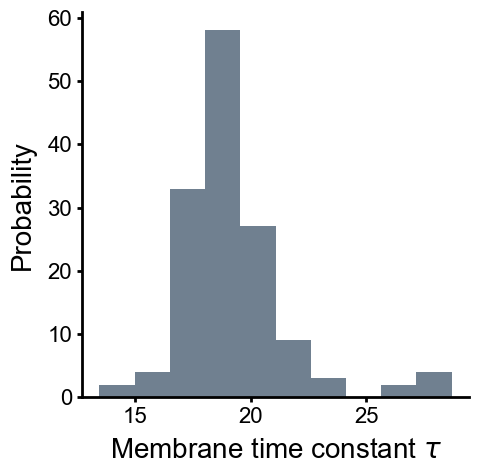

In [25]:
beta = (-0.1/np.log(params_df["beta"]))
beta = beta[beta < 30]
ax = beta.hist(color="slategrey", figsize=(5, 5))
ax.grid(False)
ax.set_ylabel("Probability", fontsize=20, labelpad=8)
ax.set_xlabel("Membrane time constant $\\tau$", fontsize=20, labelpad=8)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_linewidth(2)
ax.xaxis.set_tick_params(width=2, labelsize=16)
ax.spines["left"].set_linewidth(2)
ax.yaxis.set_tick_params(width=2, labelsize=16)